# 時系列専用の探索的手法

## ローリングウィンドウ

`set.seed()`にて`rnorm()`の乱数シードを固定。

In [1]:
set.seed(5)

x <- rnorm(n = 100, mean = 0, sd = 10) + 1:100
mn <- function(n) rep(1/n, n)

`filter()`は線形フィルタを適用する関数。method引数には以下の2つを渡すことが出来る。

- "convolution": 移動平均
- "recursive": 自己回帰

引数methodのデフォルトで`"convolution"`が適用される。

- 赤破線: 5項移動平均
- 緑破線: 50項移動平均

凡例を表示する為に、本に記載のコードに若干の変更を追加。

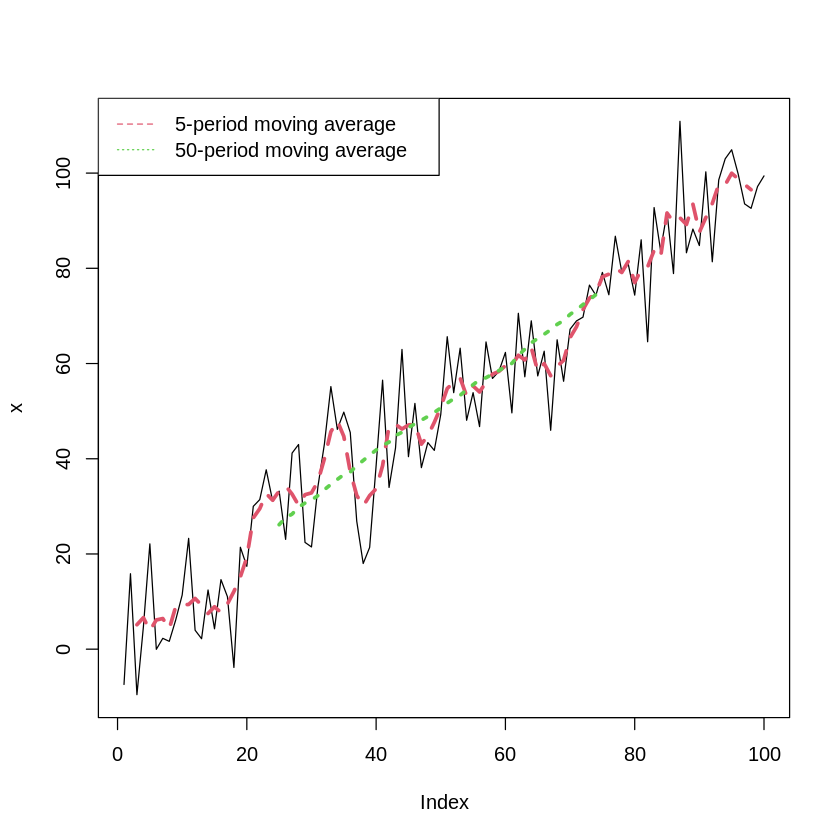

In [2]:
cols <- c(2, 3)
ltys <- c(2, 3)

plot(x, type = "l",               lwd = 1)
lines(filter(x, mn( 5)), col = cols[1], lwd = 3, lty = ltys[1])
lines(filter(x, mn(50)), col = cols[2], lwd = 3, lty = ltys[2])

labels <- c("5-period moving average", "50-period moving average")
legend("topleft", legend = labels, col=cols, lty = ltys)

**左揃え**のローリングウィンドウでは、ウィンドウサイズ分の**過去**の値を対象とする。

**右揃え**のローリングウィンドウでは、ウィンドウサイズ分の**未来**の値を対象とする。

今回はウィンドウサイズに20を指定し、ウィンドウ内の最低値を表示している。

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




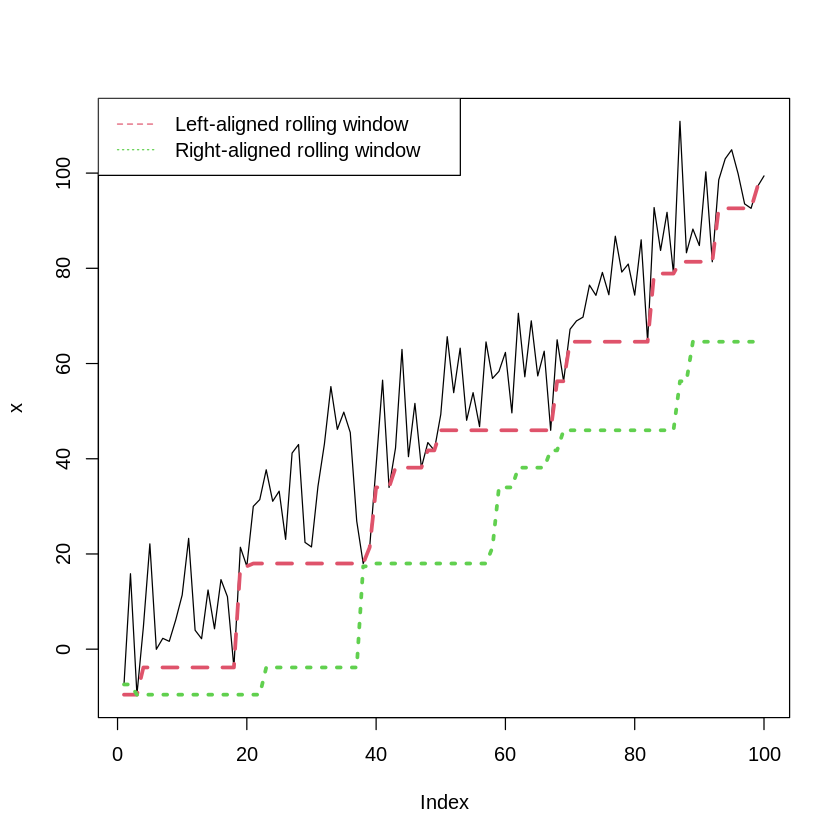

In [3]:
require(zoo)

f1 <- rollapply(zoo(x), 20, function(w) min(w),
                align = "left", partial = TRUE)
f2 <- rollapply(zoo(x), 20, function(w) min(w),
                align = "right", partial = TRUE)

plot(x, lwd = 1, type = "l")
lines(f1, col = cols[1], lwd = 3, lty = ltys[1])
lines(f2, col = cols[2], lwd = 3, lty = ltys[2])

labels <- c("Left-aligned rolling window", "Right-aligned rolling window")
legend("topleft", legend = labels, col=cols, lty = ltys)

## 拡張ウィンドウ

拡張ウィンドウは、ローリングウィンドウとは違って、ウィンドウサイズが時間とともに大きくなる。

**定常**な時系列に対して上手くいく方法。

以下の例では、拡張ウィンドウによって最大値と平均値を表示する。

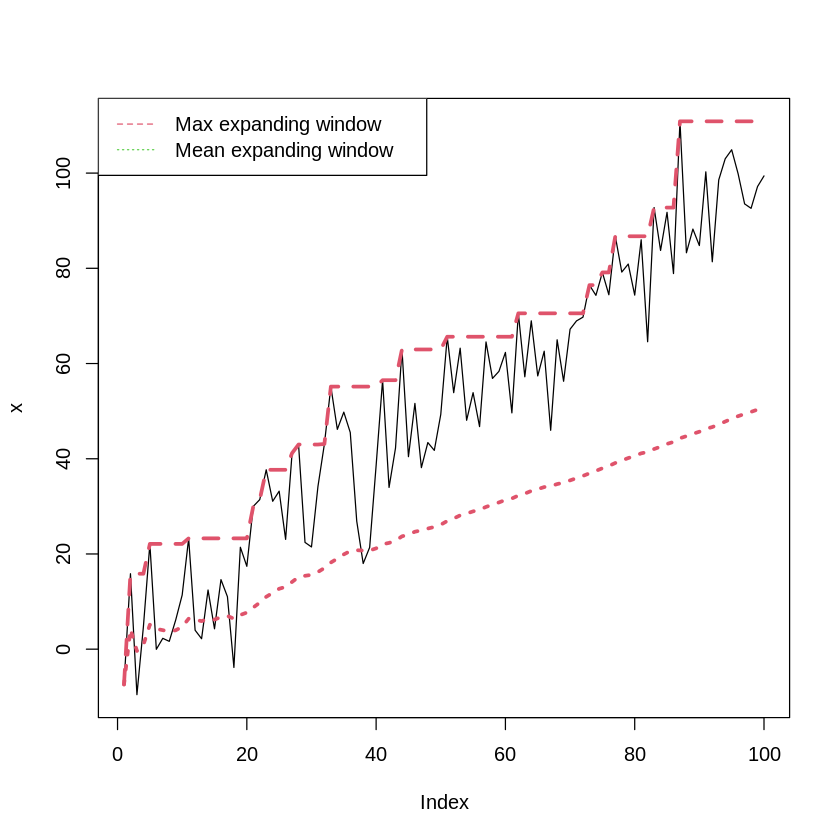

In [4]:
plot(x, type = "l", lwd = 1)
lines(cummax(x),             col = cols[1], lwd = 3, lty = ltys[1])
lines(cumsum(x)/1:length(x), col = cols[1], lwd = 3, lty = ltys[2])

labels <- c("Max expanding window", "Mean expanding window")
legend("topleft", legend = labels, col=cols, lty = ltys)

`rollapply()`を使って同じプロットを描画すると以下のようになる。

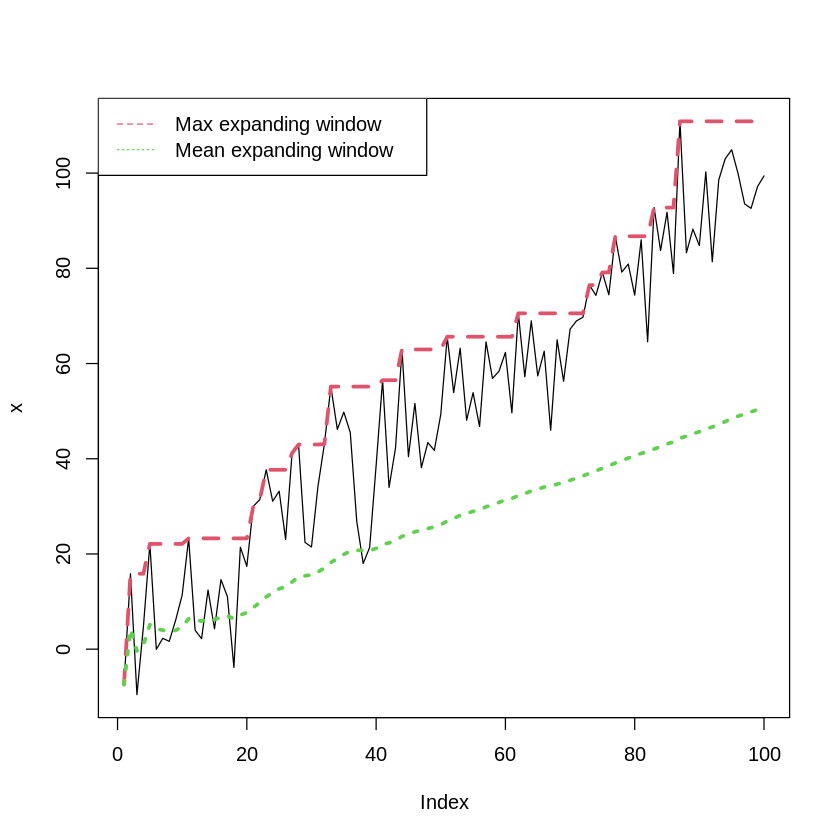

In [5]:
plot(x, type = "l", lwd = 1)
lines(rollapply(zoo(x), seq_along(x), function(w) max(w),
                partial = TRUE, align = "right"),
      col = cols[1], lwd = 3, lty = ltys[1])

lines(rollapply(zoo(x), seq_along(x), function(w) mean(w),
                partial = TRUE, align = "right"),
      col = cols[2], lwd = 3, lty = ltys[2])

labels <- c("Max expanding window", "Mean expanding window")
legend("topleft", legend = labels, col=cols, lty = ltys)

## 自己相関

自己相関関数（Autocorrelation function; ACF）プロットを見ると自己相関を直感的に理解できる。

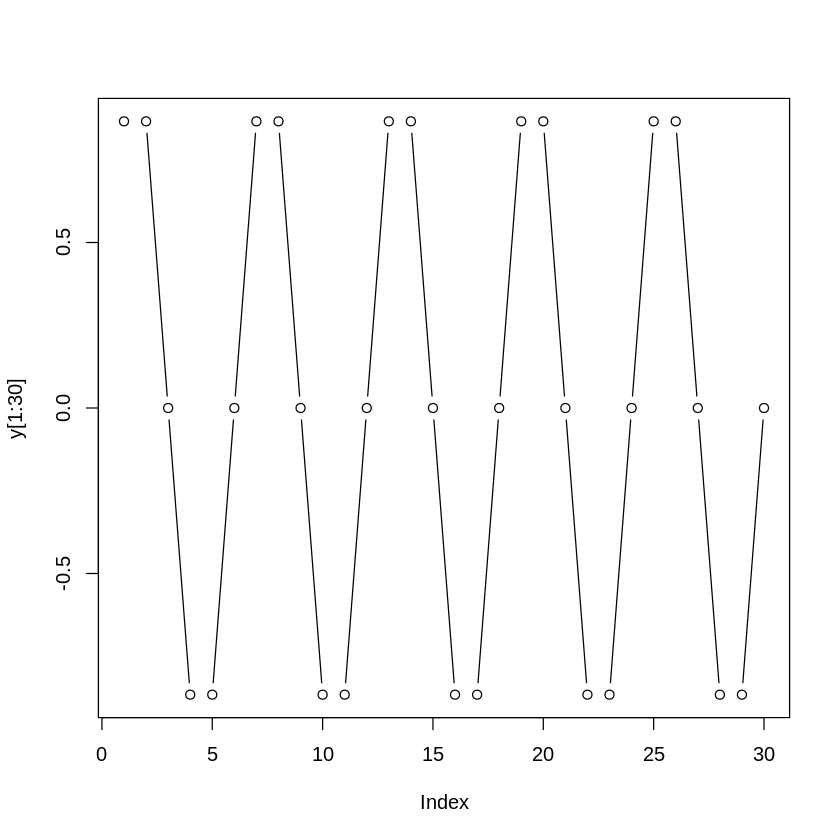

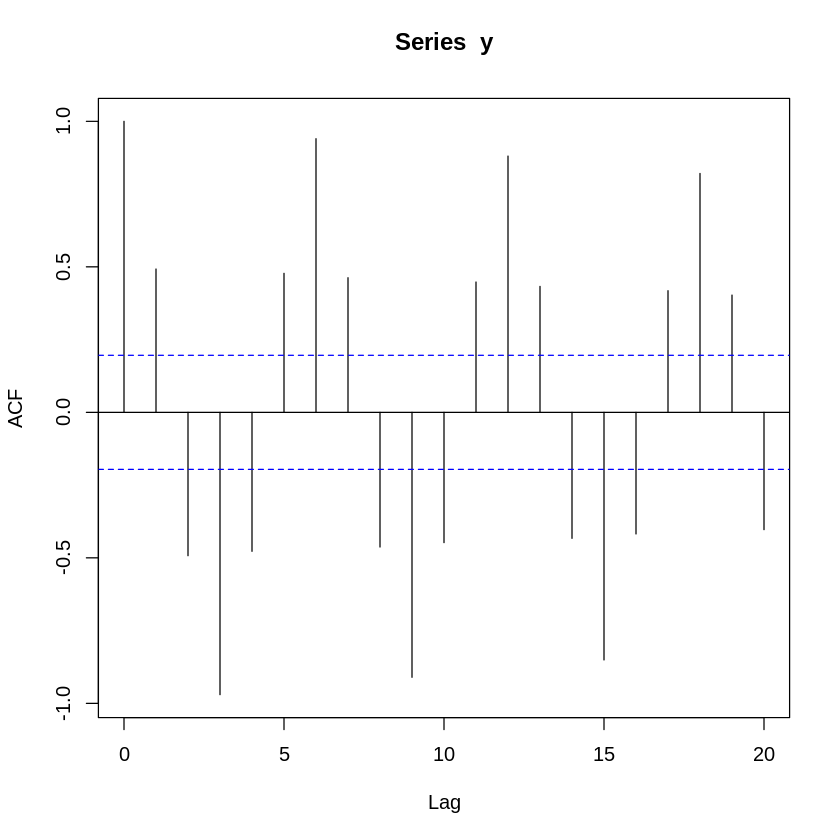

In [6]:
x <- 1:100
y <- sin(x * pi / 3)
plot(y[1:30], type = "b")
acf(y)

`shift()`を直接呼び出せなかったため、`data.table::shift()`というようにライブラリを指定して呼び出す。

ACFで図示した自己相関係数とほぼ一致している。

In [7]:
cor(y, data.table::shift(y, 1), use = "pairwise.complete.obs")
cor(y, data.table::shift(y, 2), use = "pairwise.complete.obs")

[1] 0.5001531

[1] -0.5037152

## 偏自己相関

定常過程の偏自己相関関数（Partial autocorrelation function）はすぐにゼロに落ちていく。

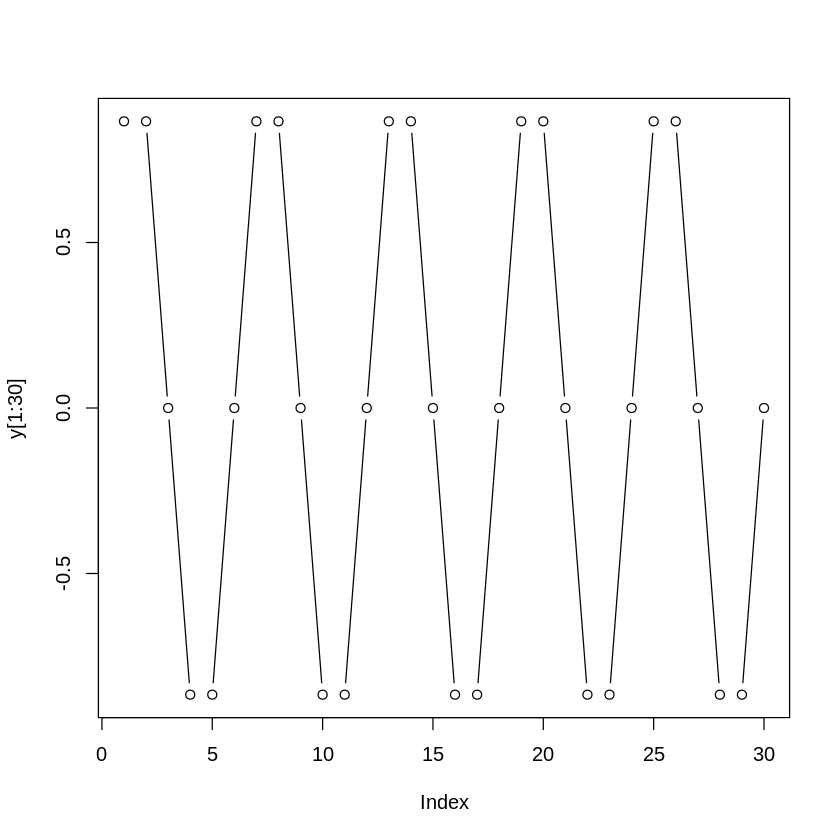

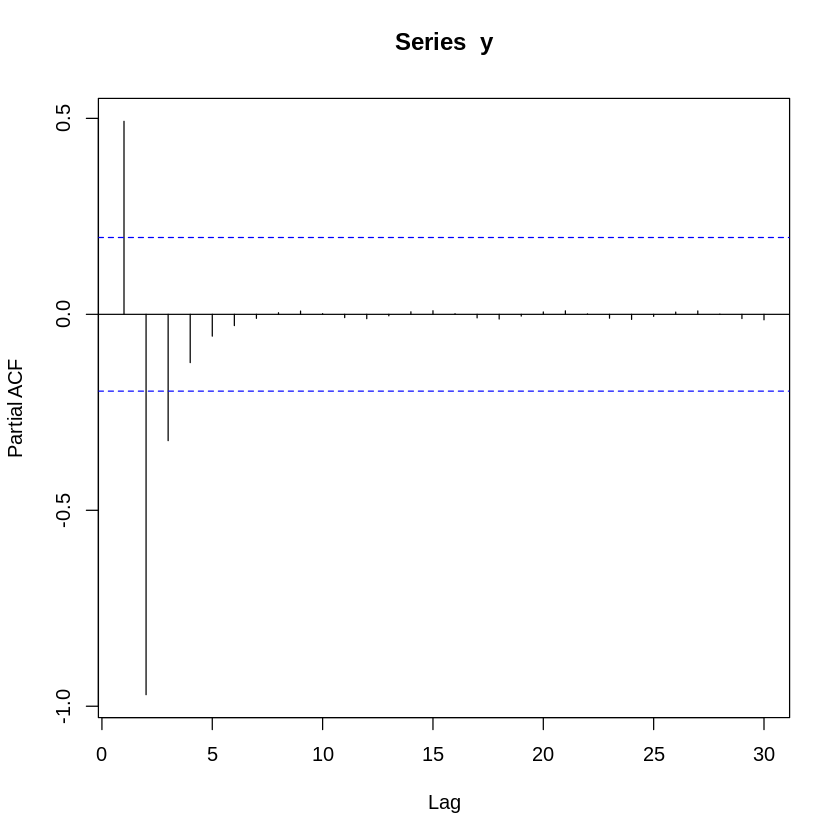

In [8]:
y <- sin(x * pi / 3)
plot(y[1:30], type = "b")
pacf(y, lag.max=30)

ACFとPACFを併せて表示。

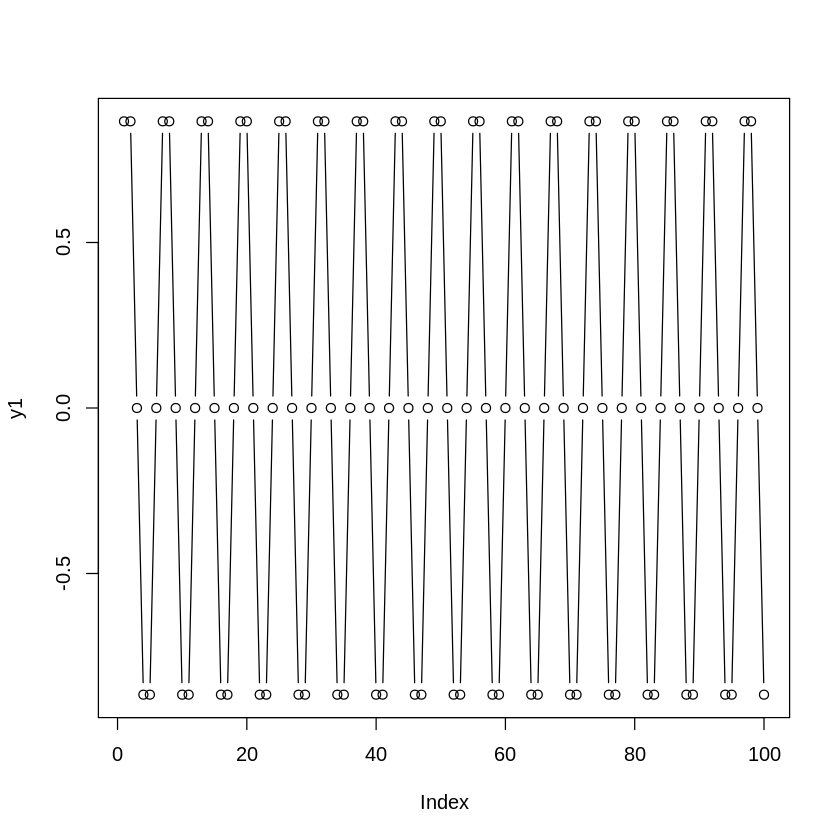

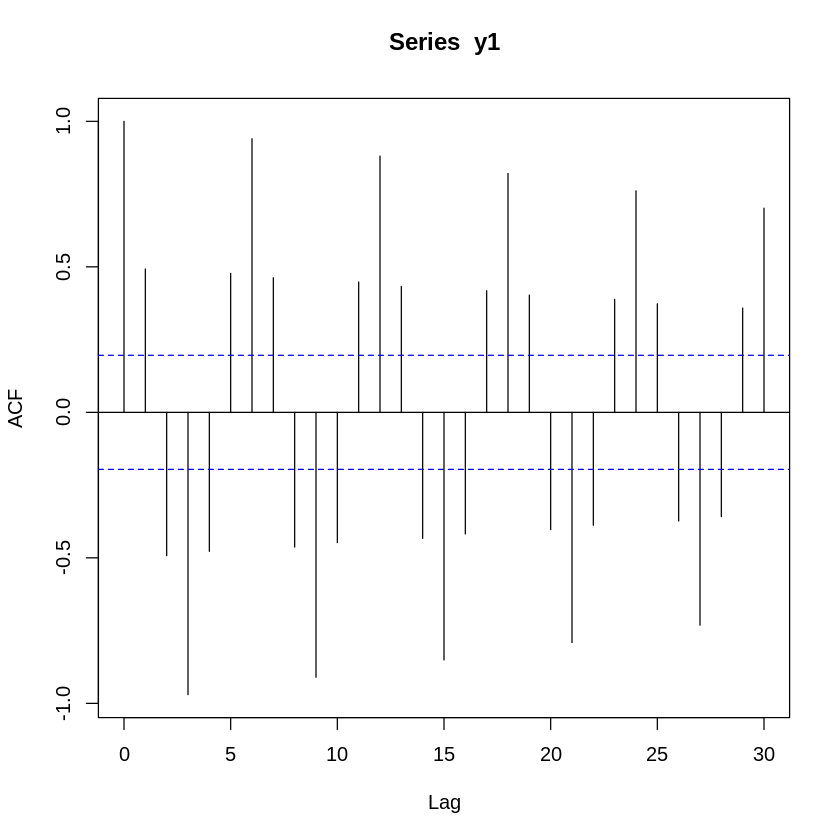

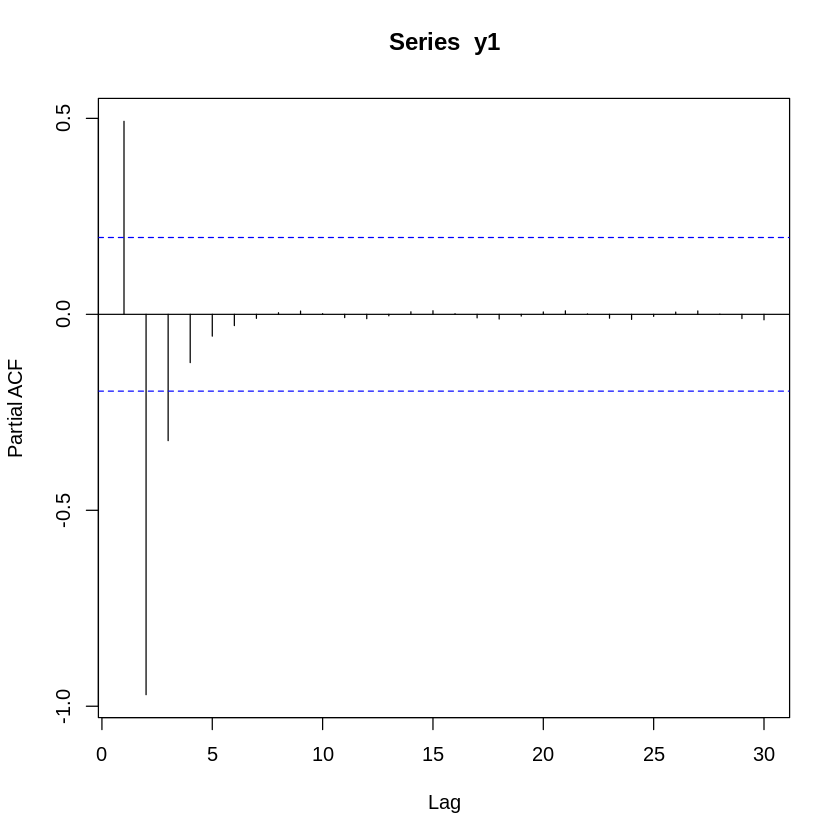

In [9]:
y1 <- sin(x * pi / 3)
plot(y1, type = "b")
acf(y1, lag.max=30)
pacf(y1, lag.max=30)

ACFとPACFを併せて表示。（周波数を変えて）

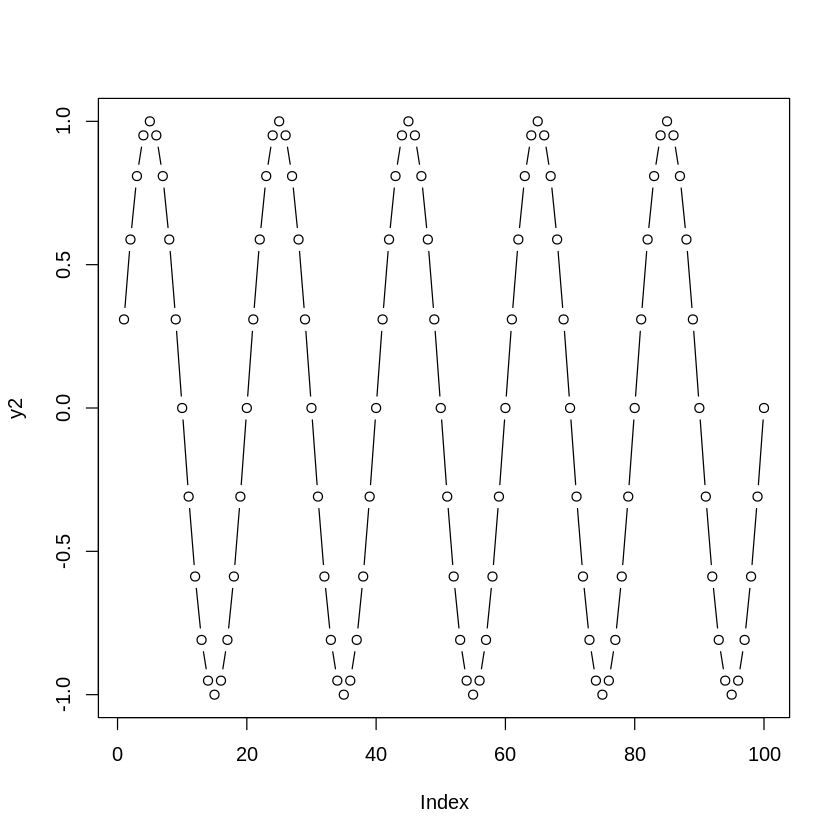

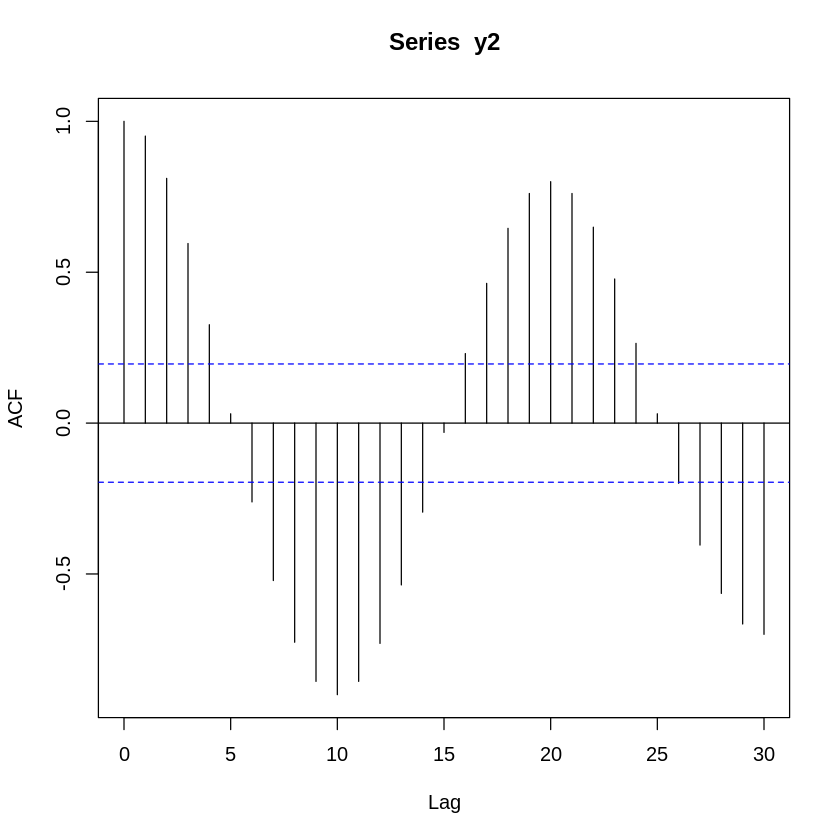

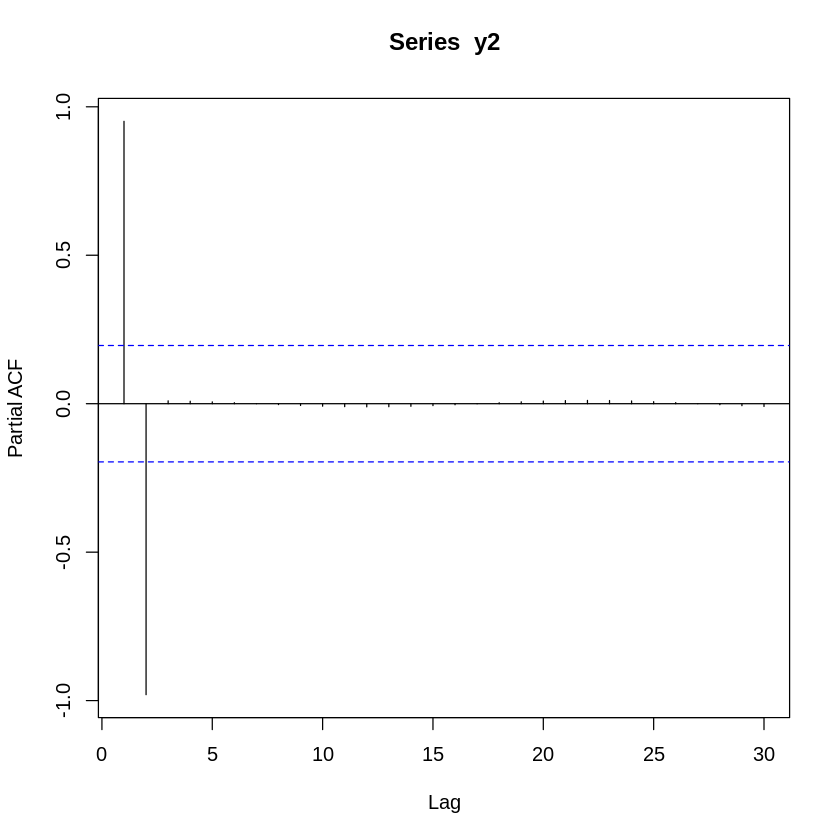

In [10]:
y2 <- sin(x * pi / 10)
plot(y2, type = "b")
acf(y2, lag.max=30)
pacf(y2, lag.max=30)

2つの系列の和を取った系列は、ACFも個々の和に等しくなる。（2つの周波数）

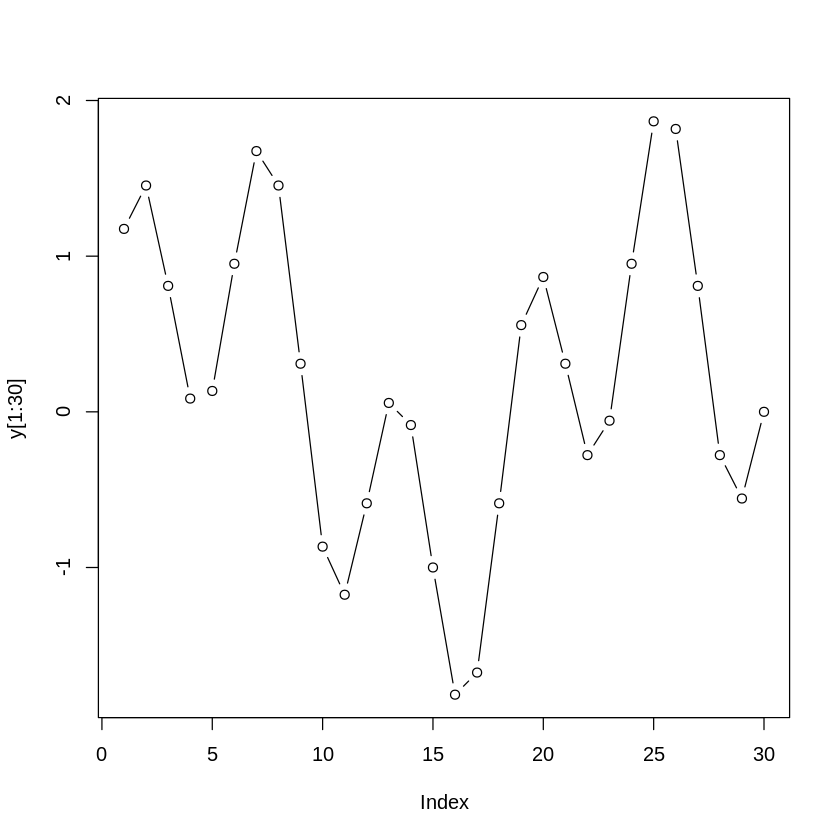

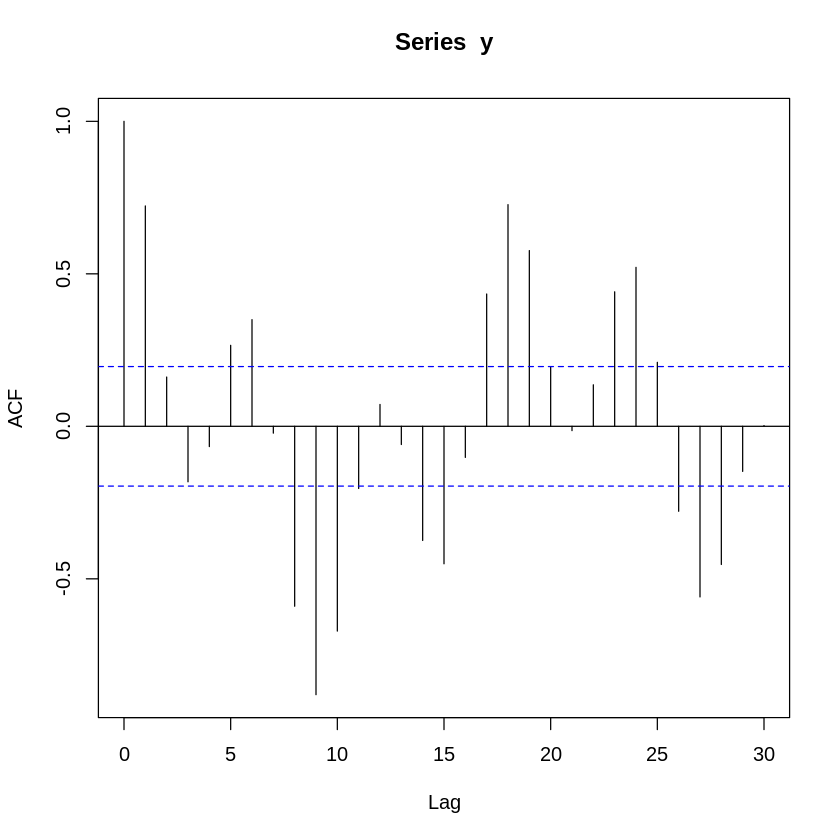

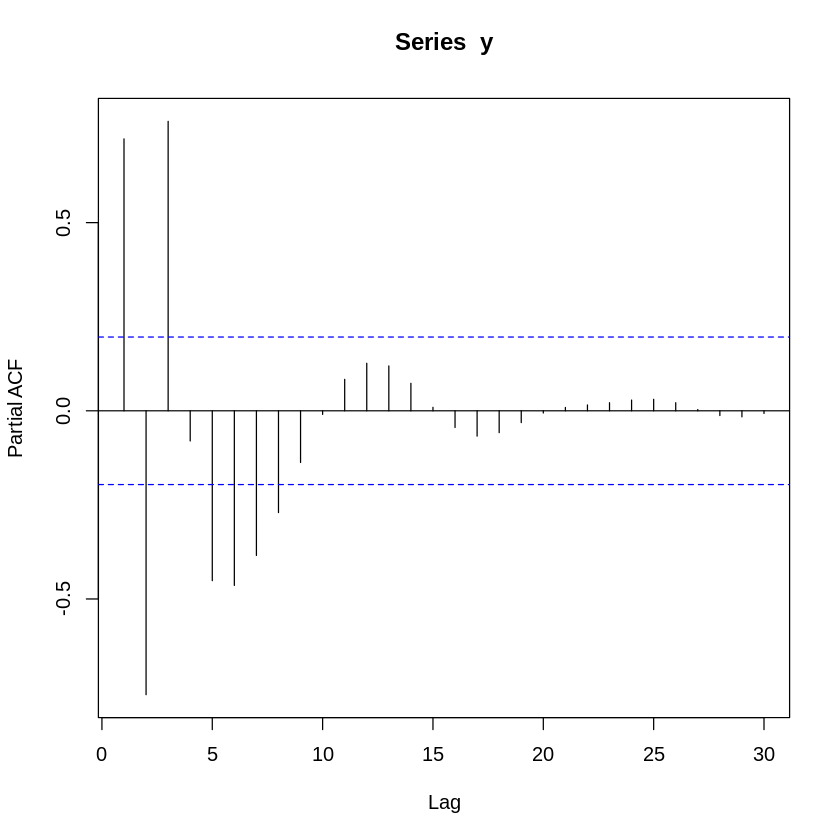

In [11]:
y <- y1 + y2
plot(y[1:30], type = "b")
acf(y, lag.max=30)
pacf(y, lag.max=30)

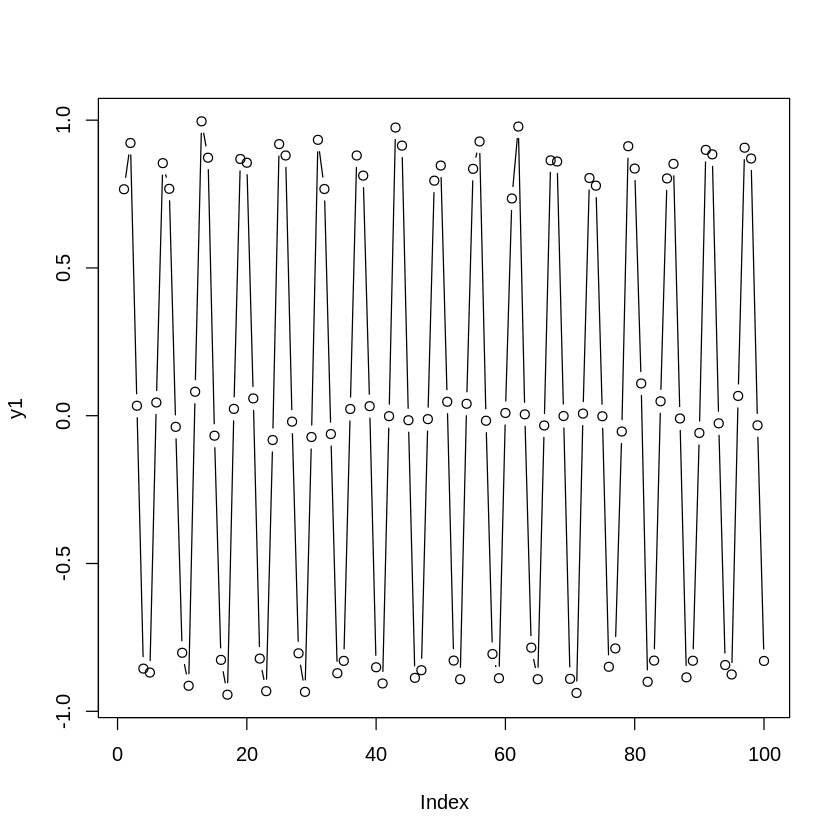

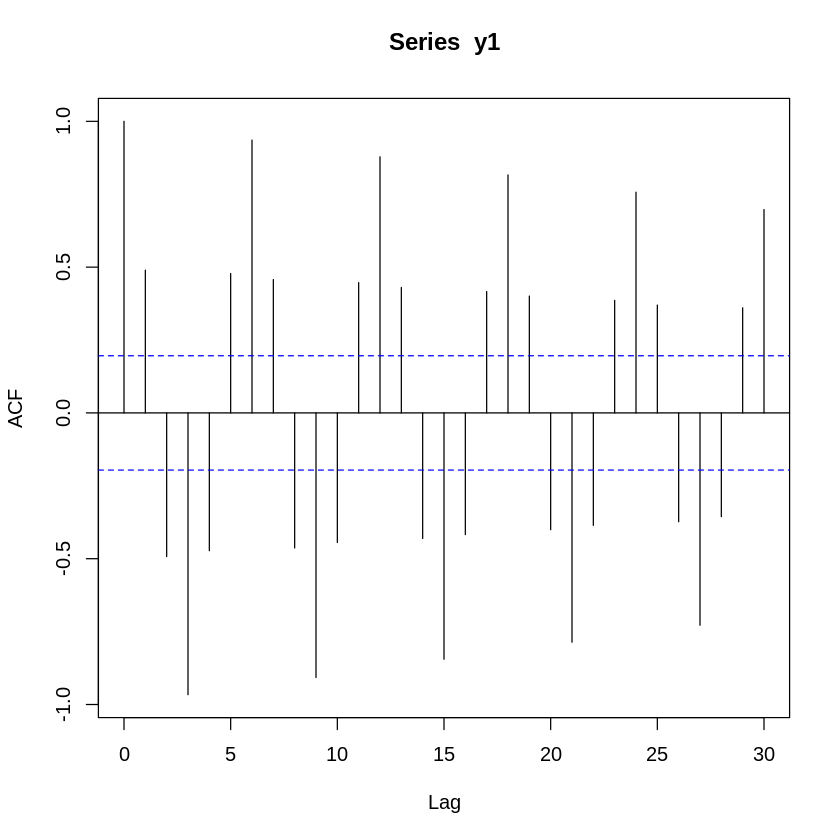

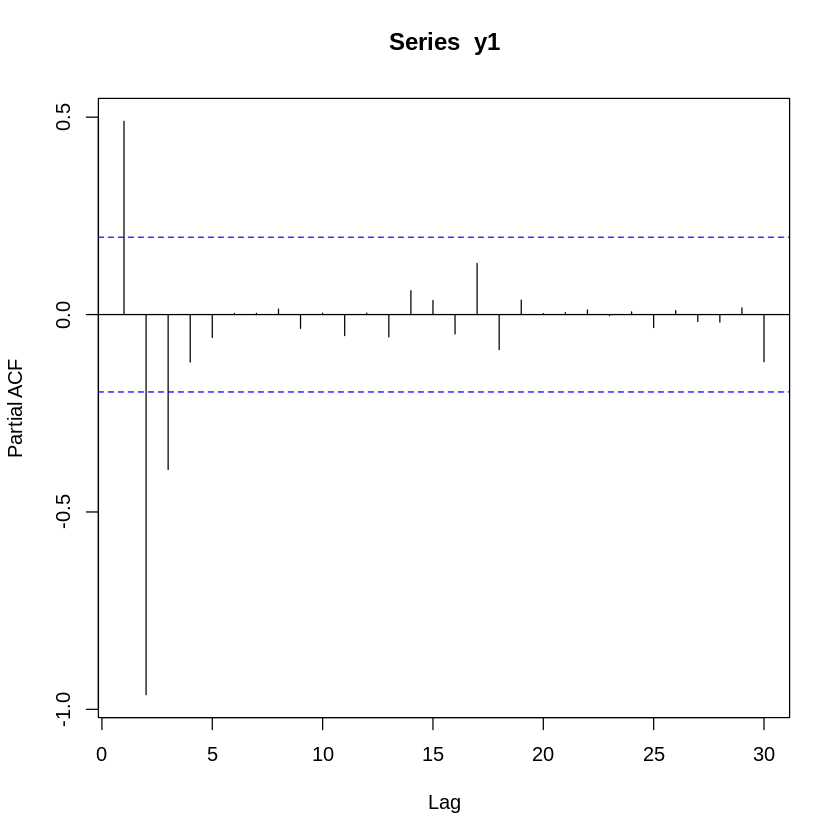

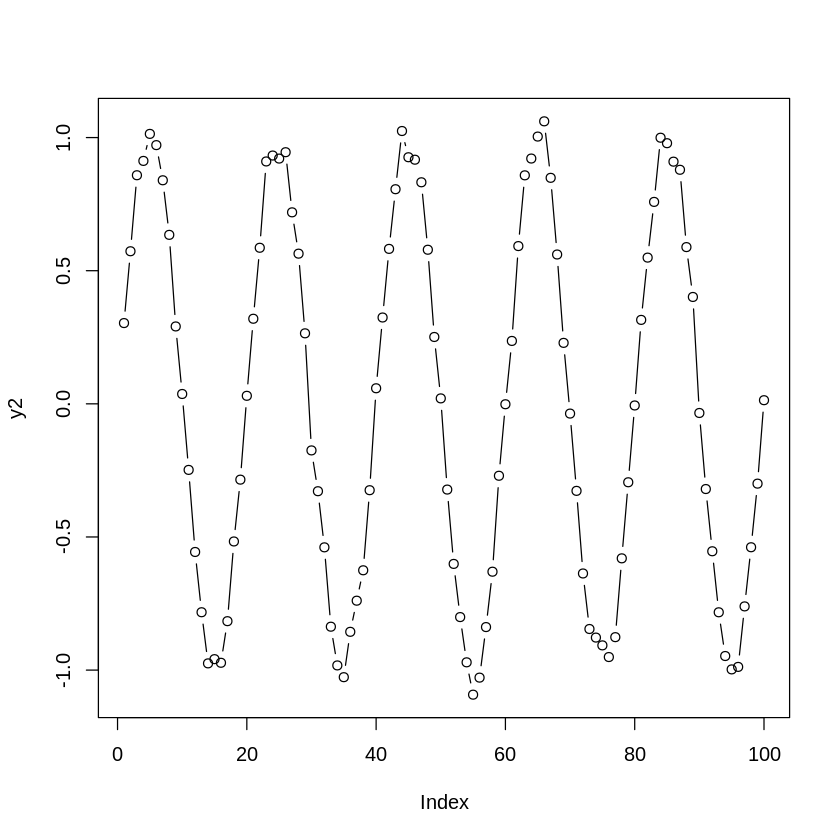

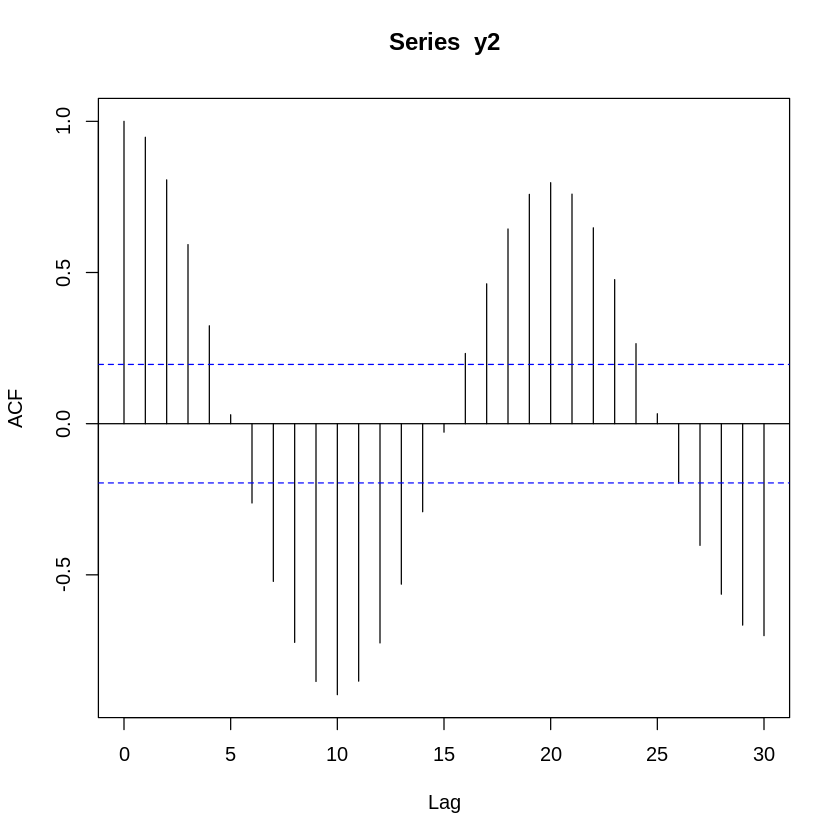

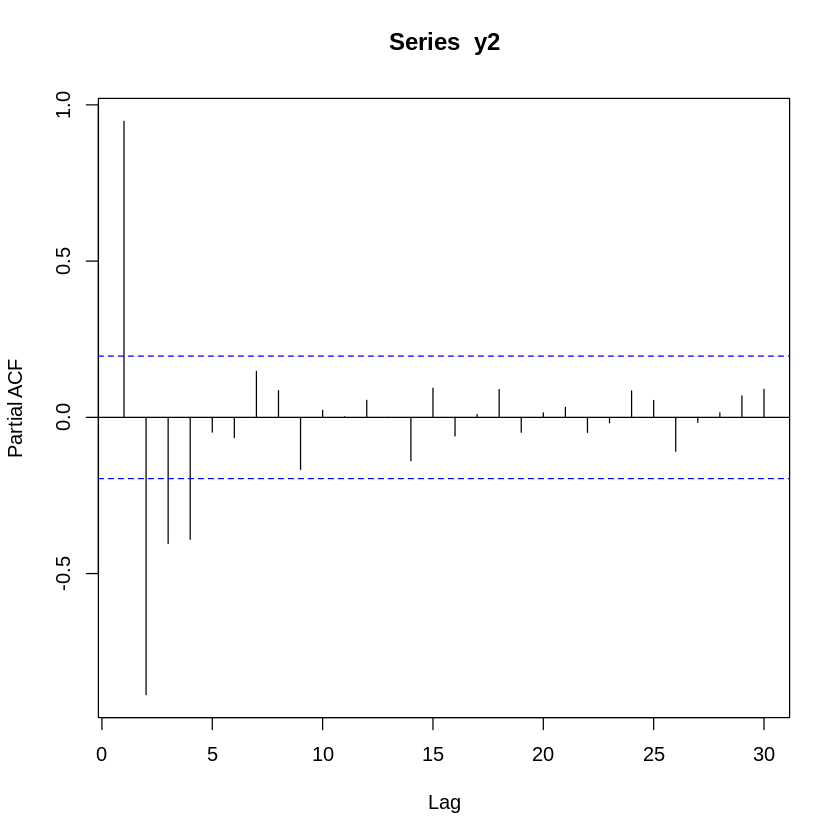

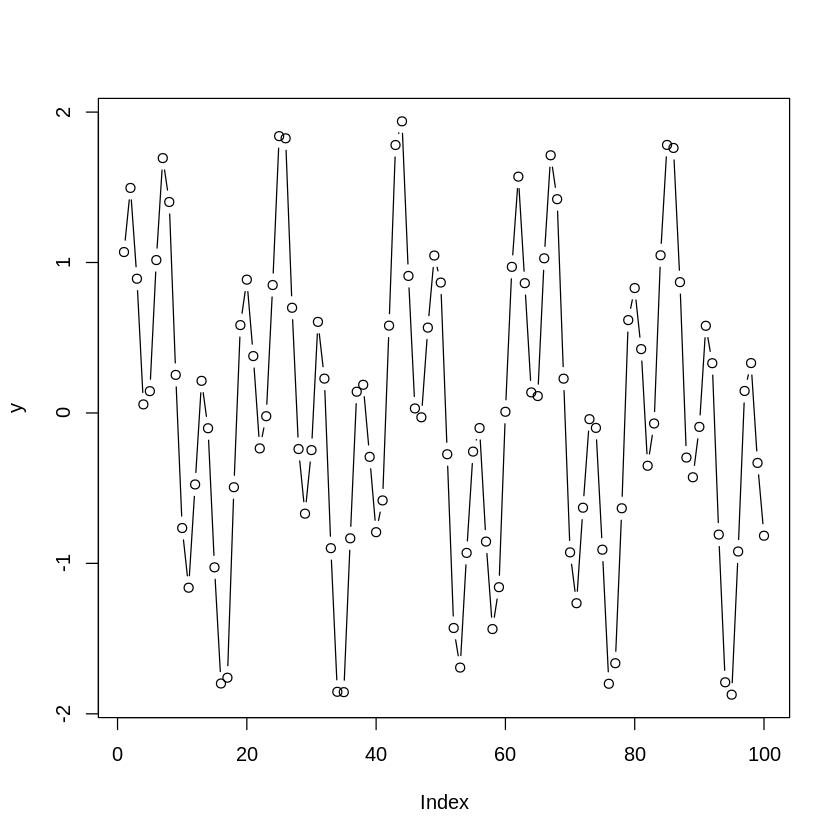

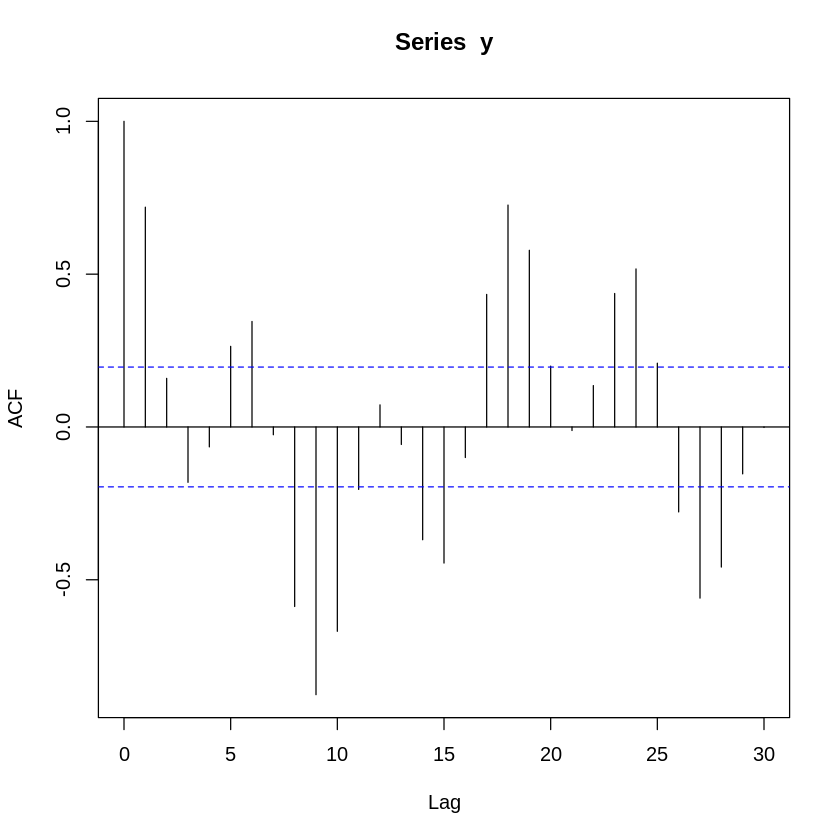

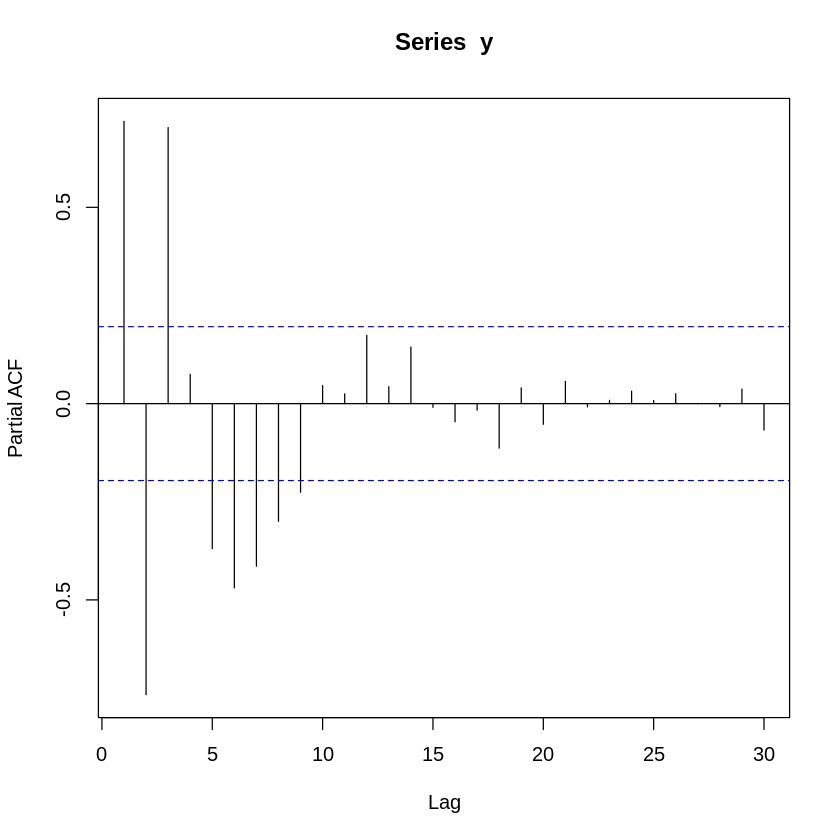

In [12]:
noise1 <- rnorm(100, sd = 0.05)
noise2 <- rnorm(100, sd = 0.05)

y1 <- y1 + noise1
y2 <- y2 + noise2
y <- y1 + y2

plot(y1, type = "b")
acf(y1, lag.max=30)
pacf(y1, lag.max=30)

plot(y2, type = "b")
acf(y2, lag.max=30)
pacf(y2, lag.max=30)

plot(y, type = "b")
acf(y, lag.max=30)
pacf(y, lag.max=30)

ノイズを大きくすると、ラグの大きさによるACFおよびPACFの減衰が速くなっている。

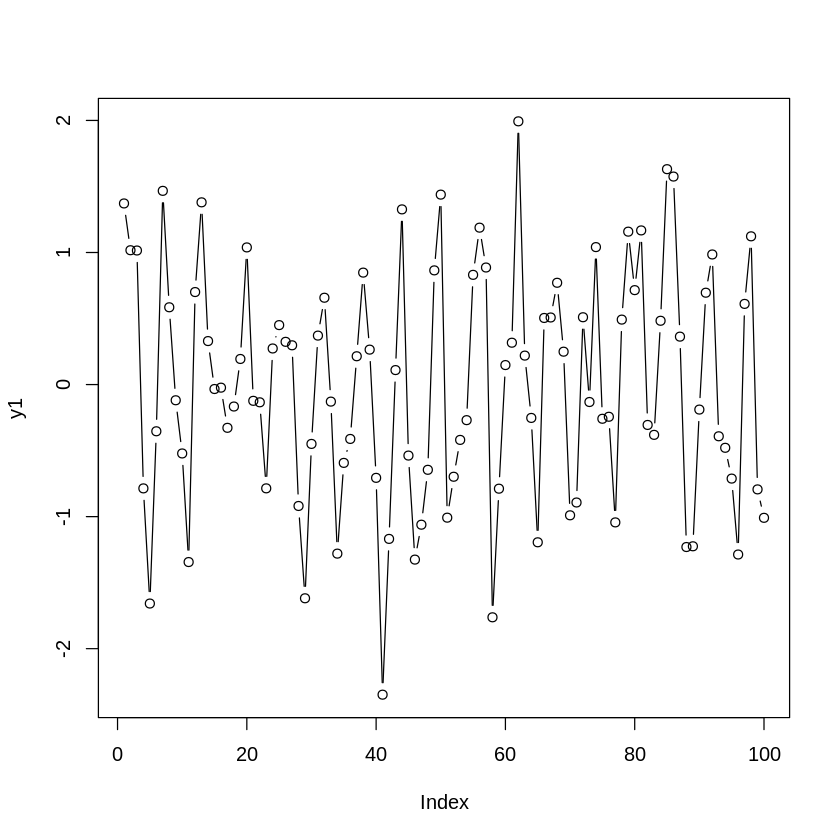

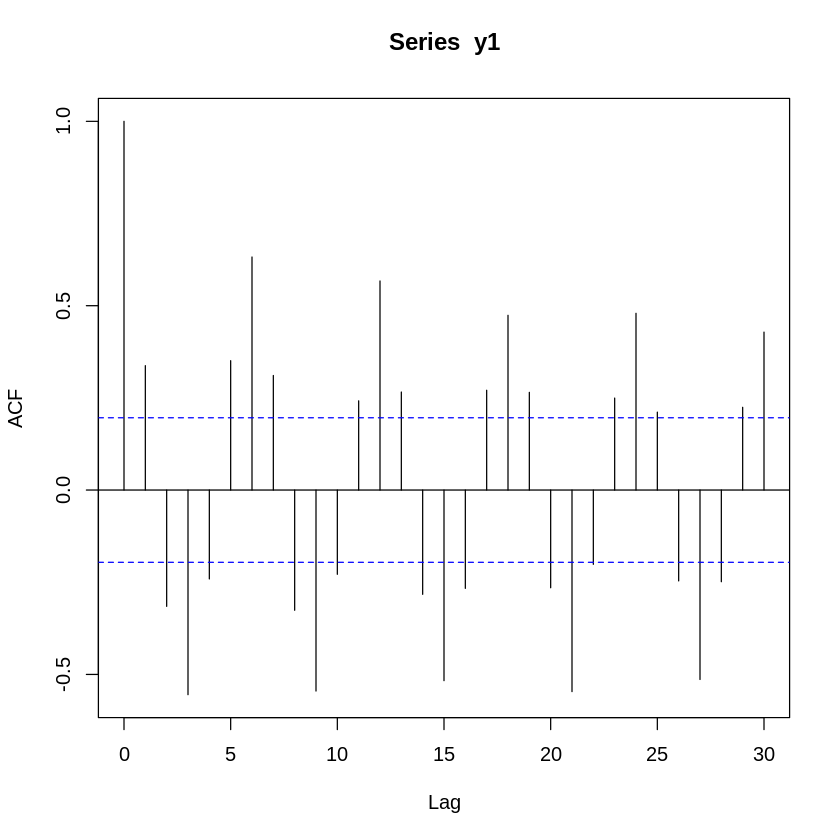

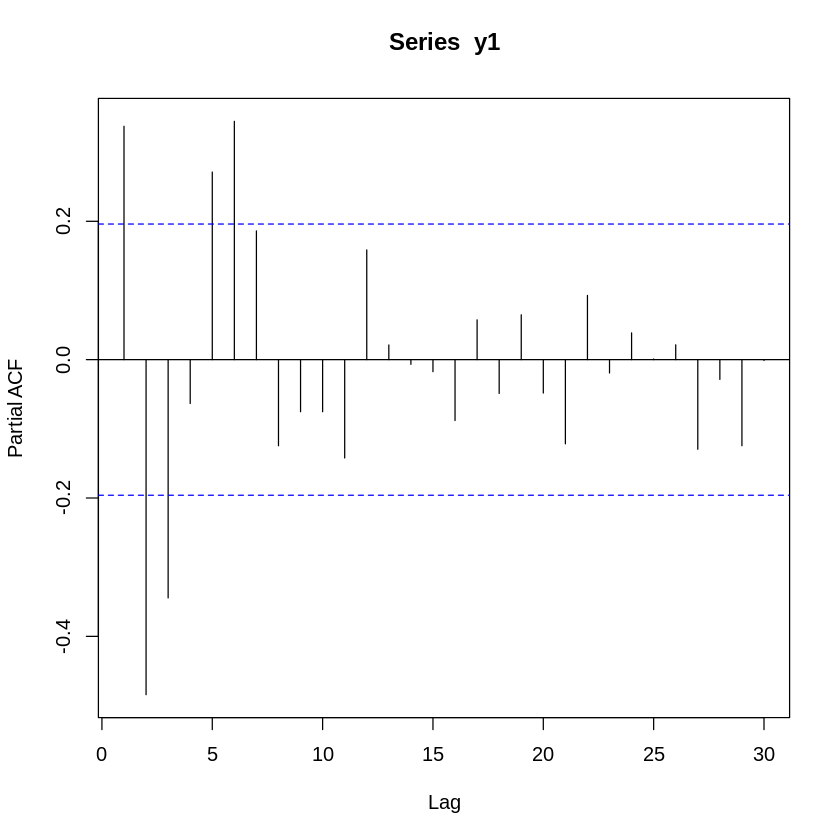

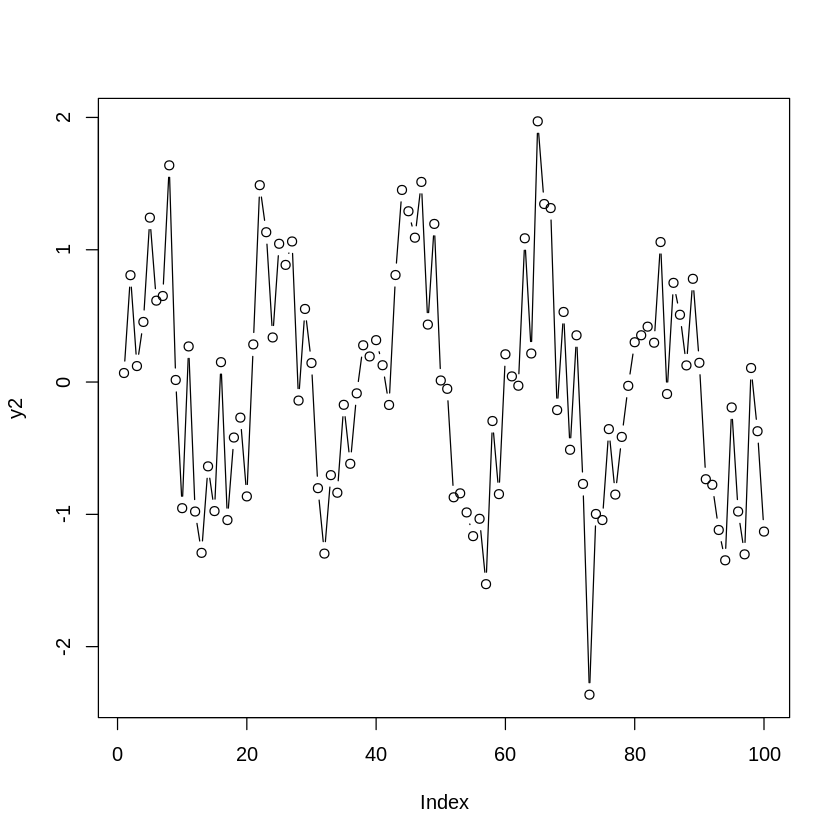

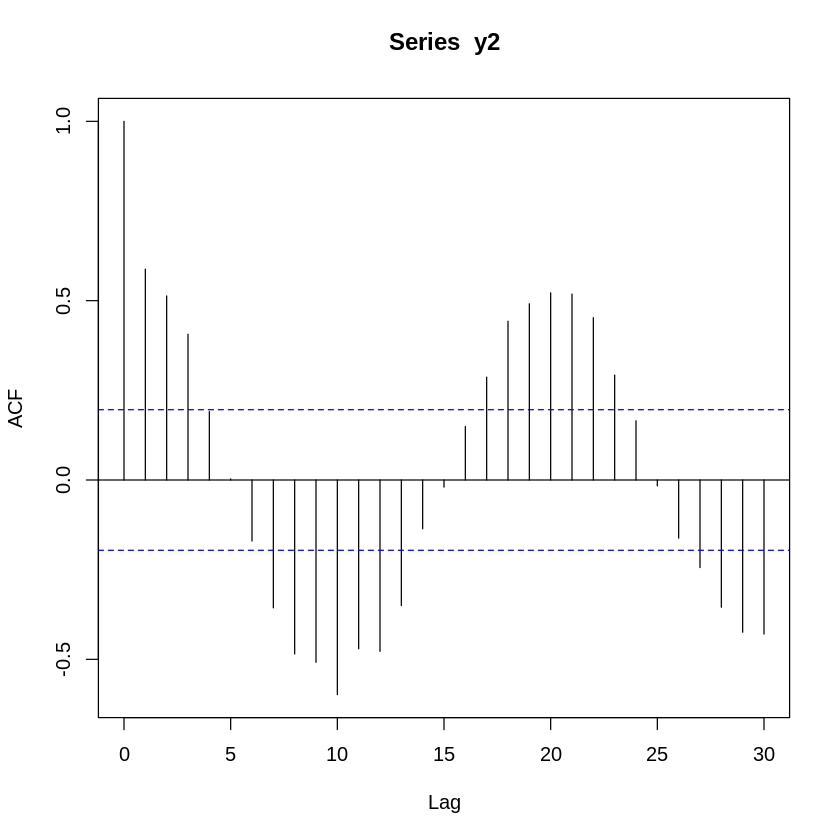

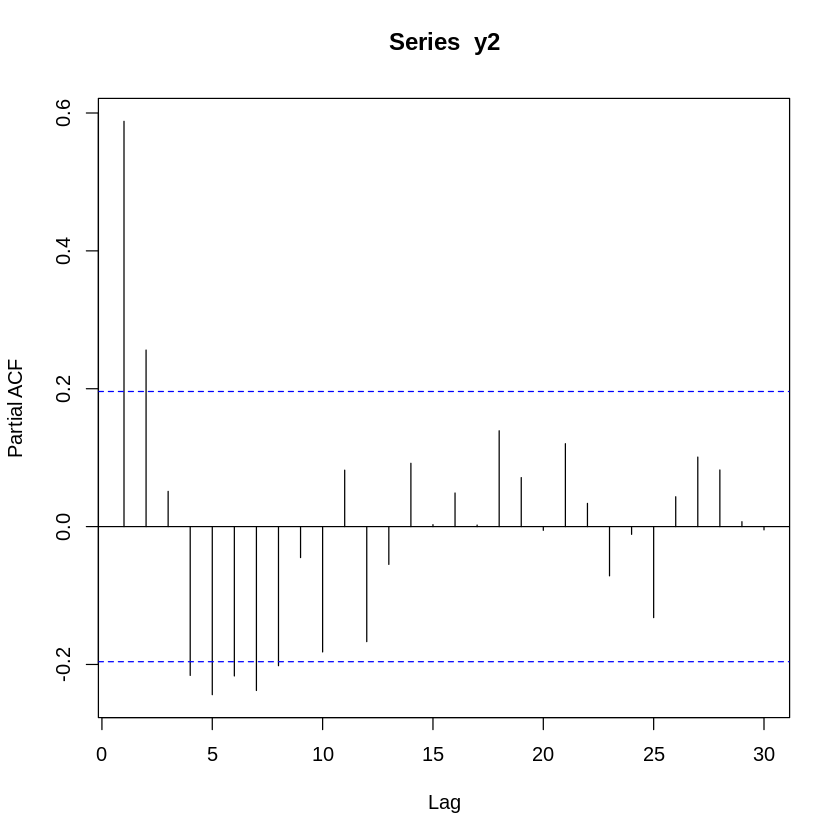

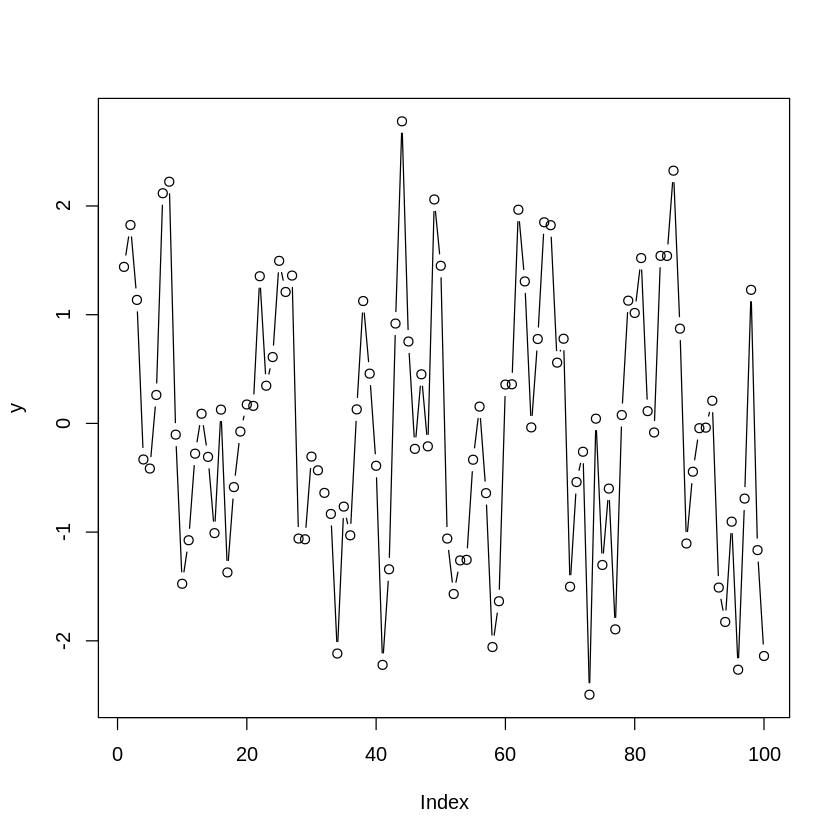

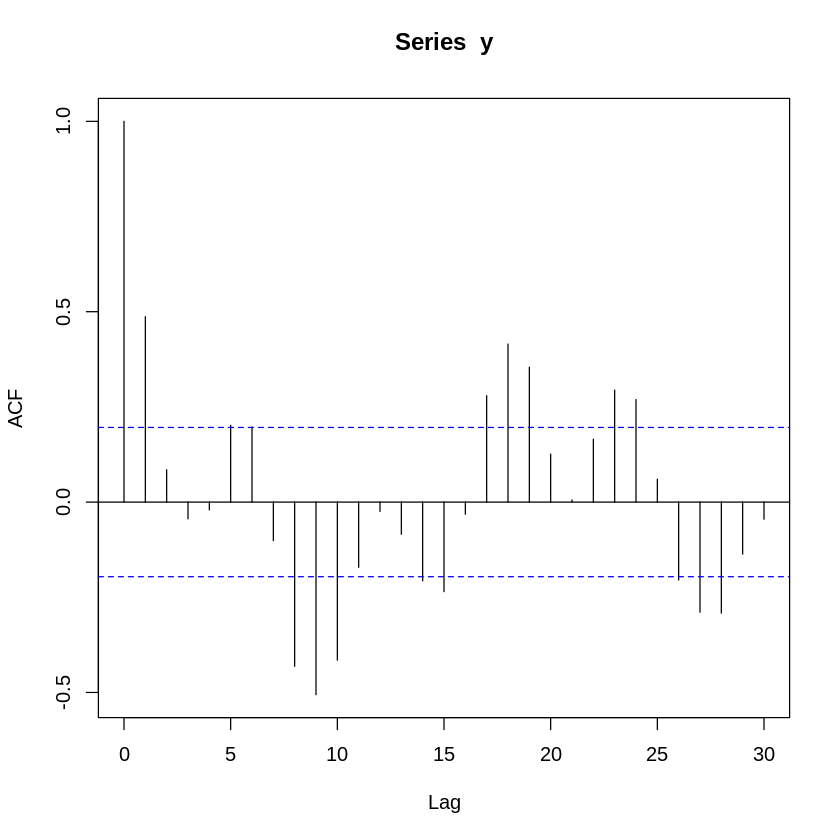

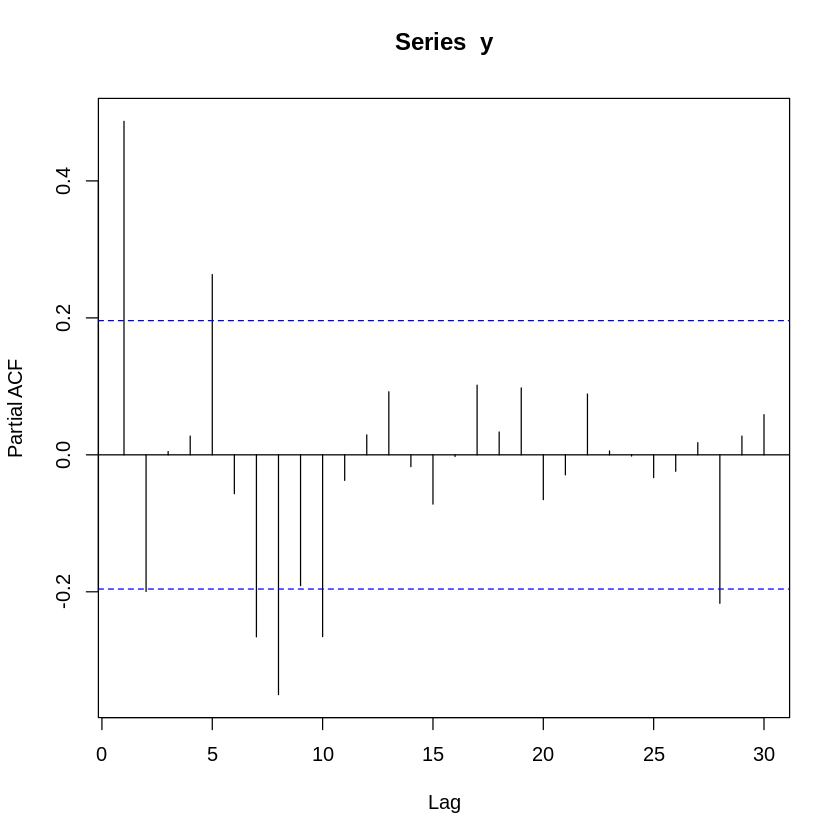

In [13]:
noise1 <- rnorm(100, sd = 0.5)
noise2 <- rnorm(100, sd = 0.5)

y1 <- y1 + noise1
y2 <- y2 + noise2
y <- y1 + y2

plot(y1, type = "b")
acf(y1, lag.max=30)
pacf(y1, lag.max=30)

plot(y2, type = "b")
acf(y2, lag.max=30)
pacf(y2, lag.max=30)

plot(y, type = "b")
acf(y, lag.max=30)
pacf(y, lag.max=30)

トレンドがあり周期性がない系列を見る。

ACFはどのラグでも似たような値。全てのラグと等しく相関を持つことを示唆。

PACFは唯一の重要な相関がラグ1だと示している。

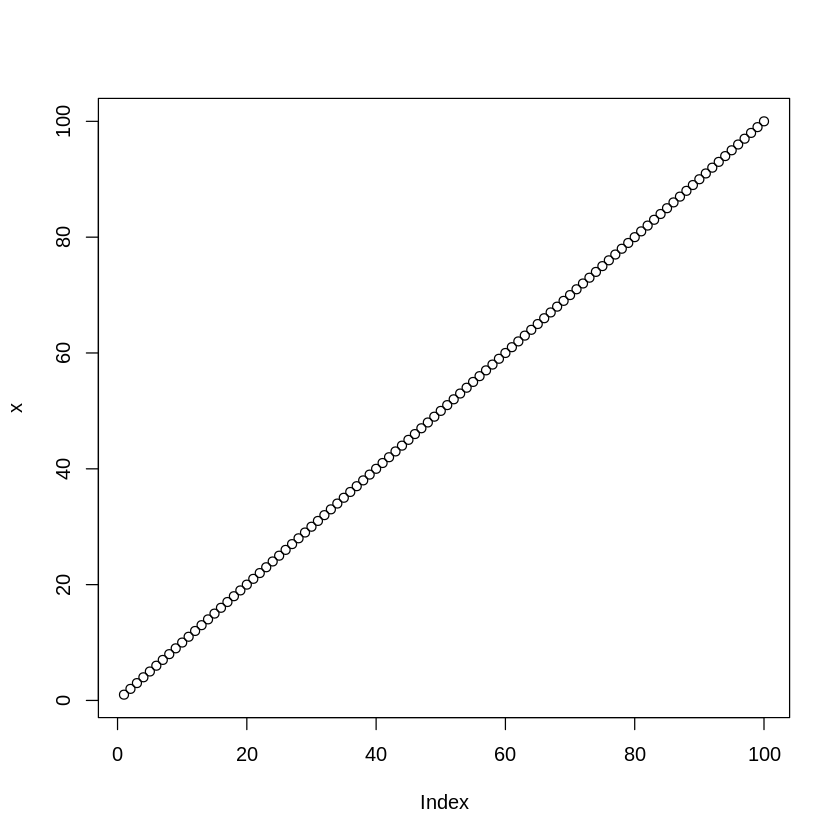

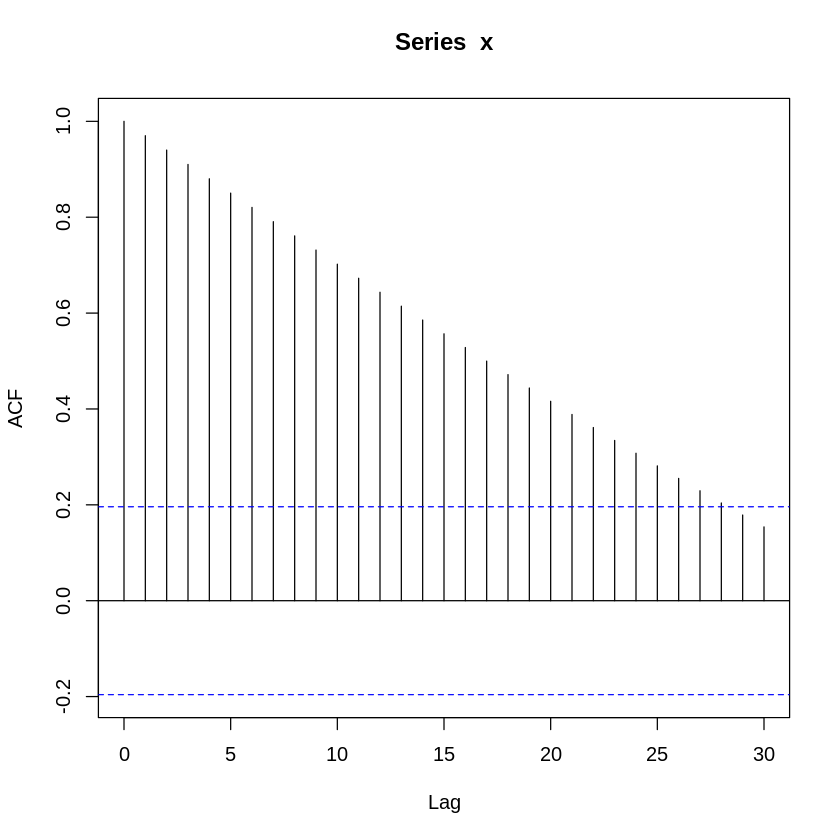

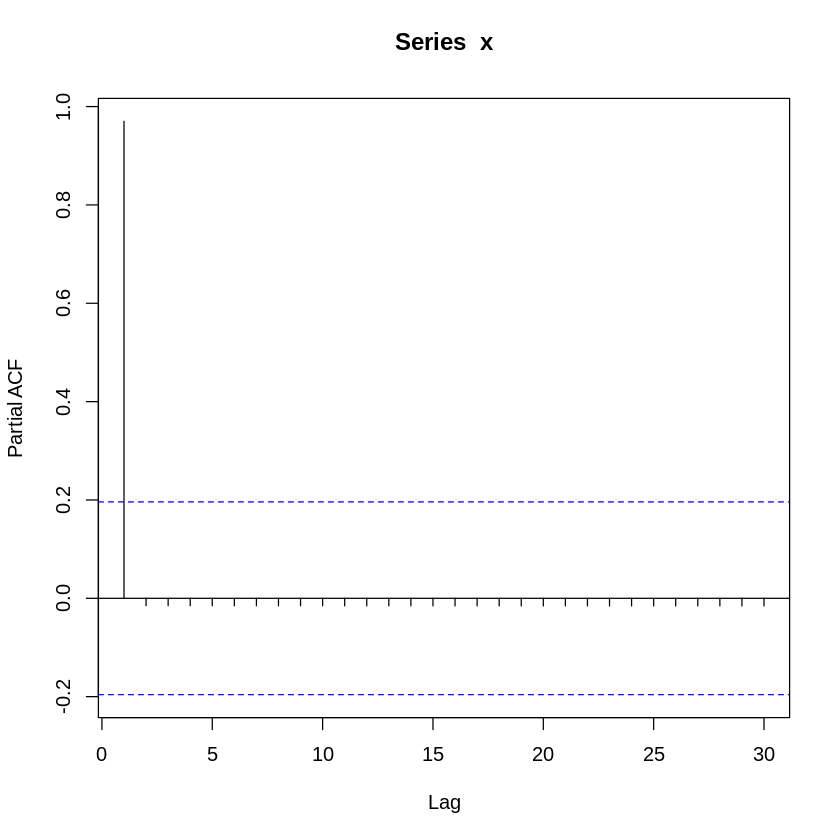

In [14]:
x <- 1:100
plot(x)
acf(x, lag.max=30)
pacf(x, lag.max=30)

現実世界のデータセット（AirPassengers）に対して同手法を実行してみる。

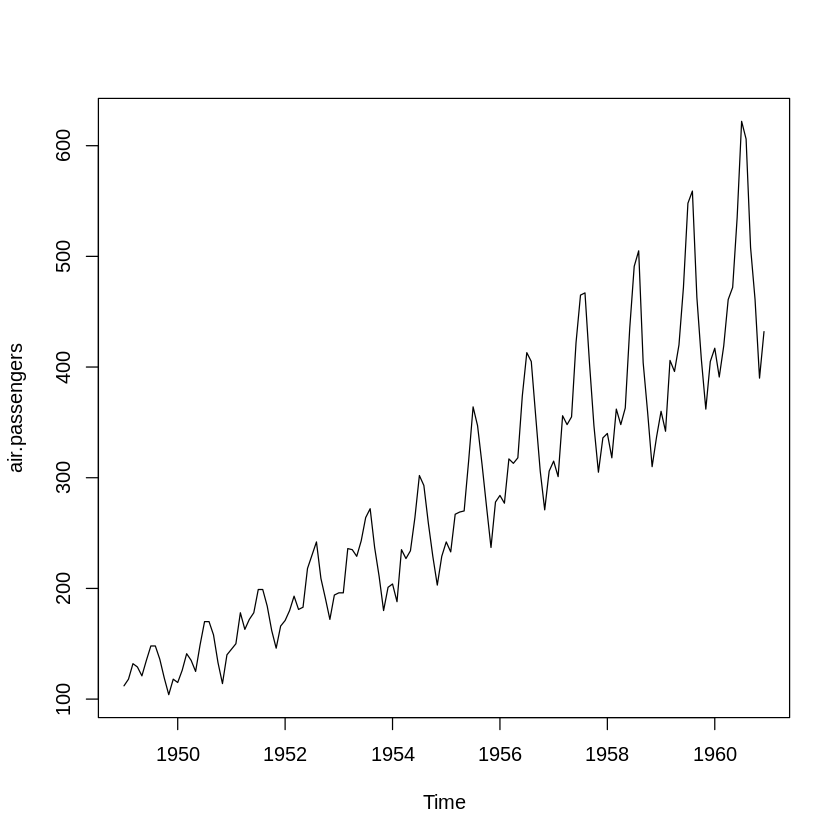

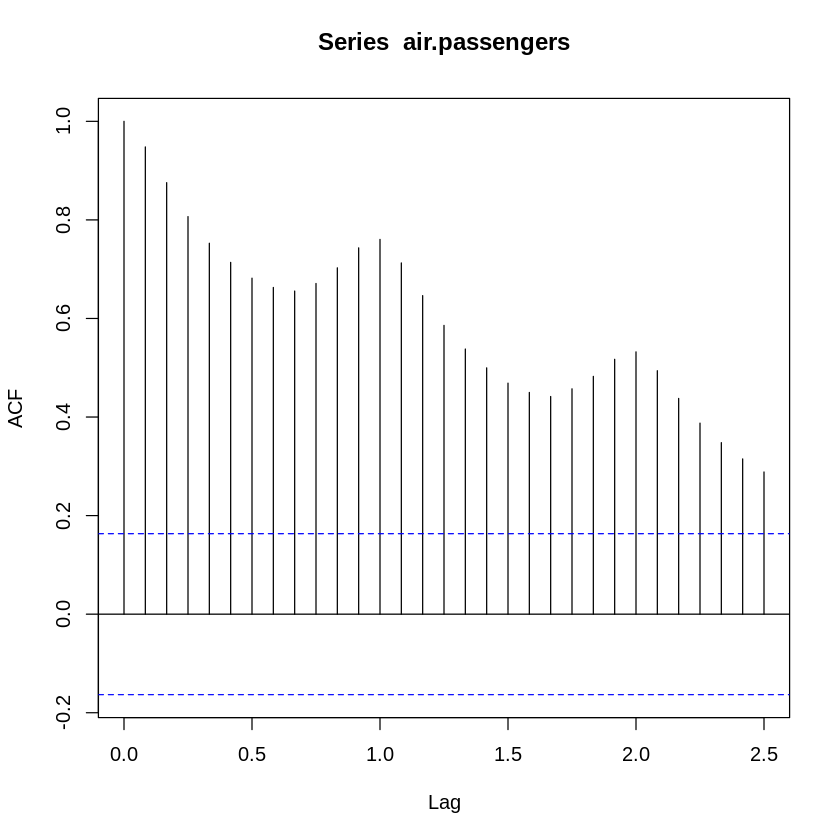

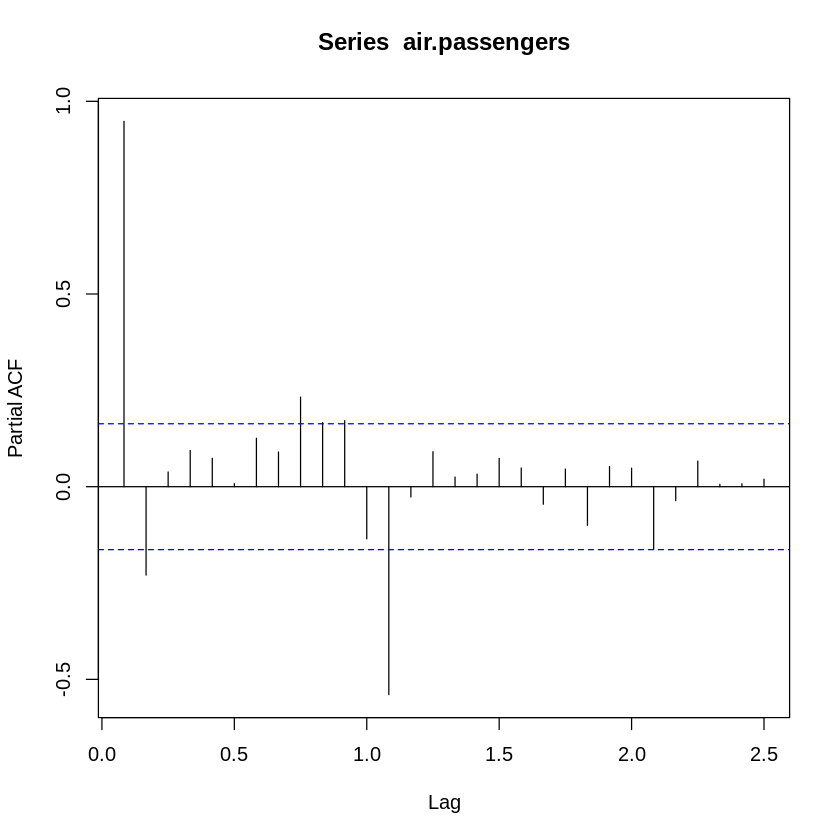

In [15]:
air.passengers <- AirPassengers

plot(air.passengers)
acf(air.passengers, lag.max=30)
pacf(air.passengers, lag.max=30)

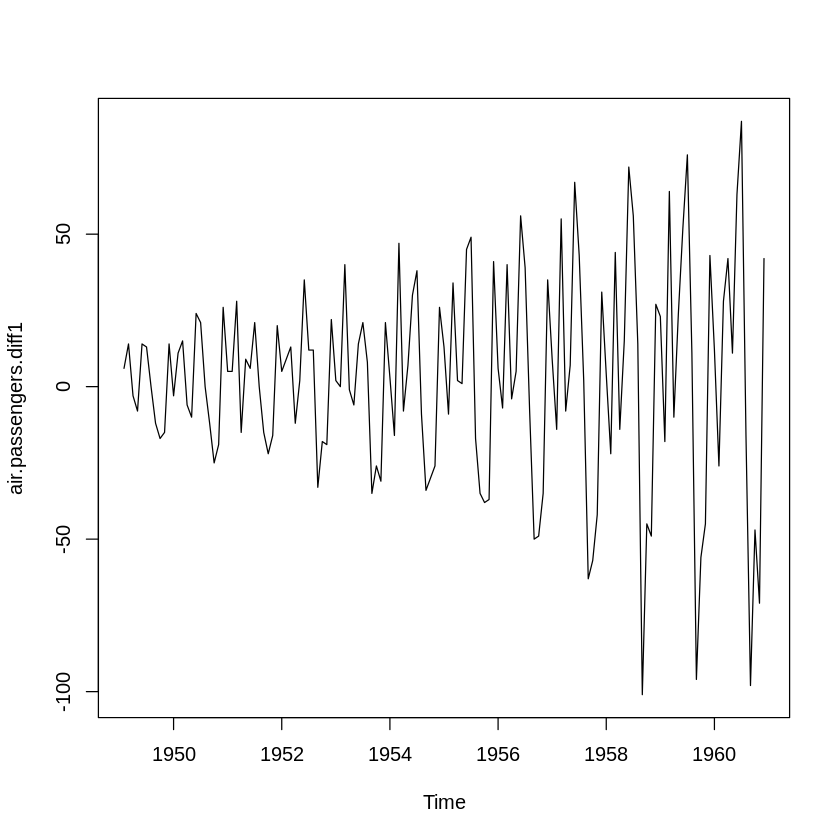

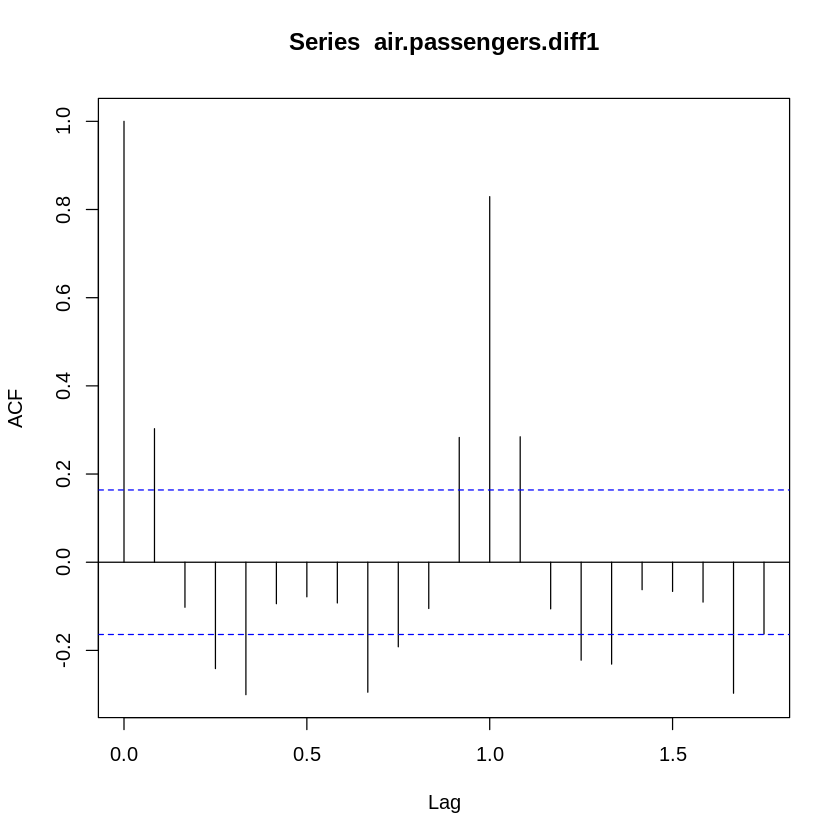

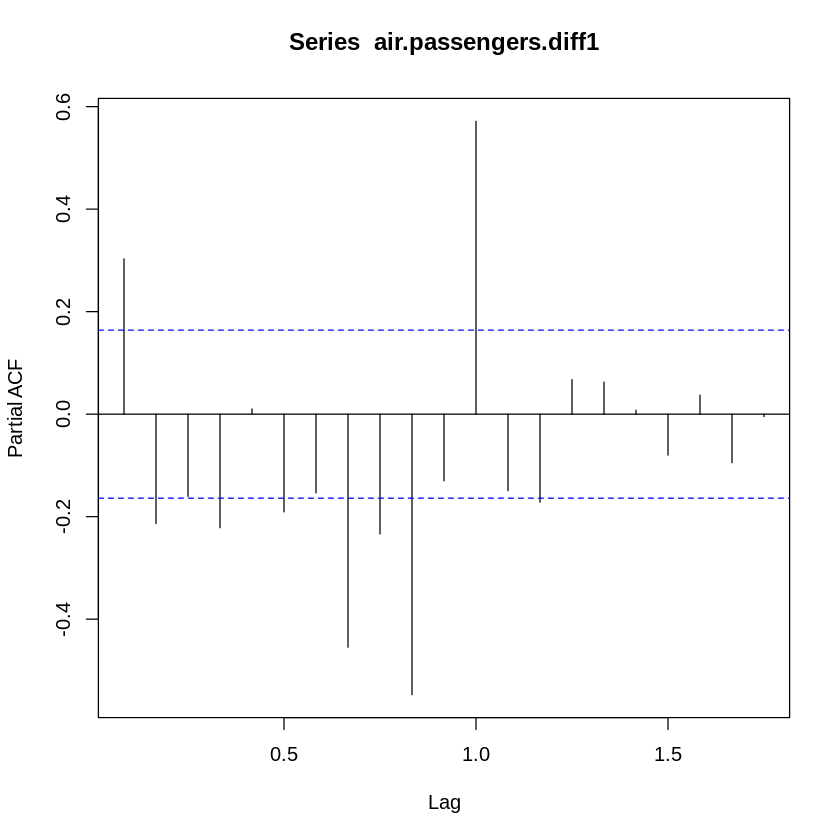

In [16]:
air.passengers.diff1 <- diff(air.passengers, 1)

plot(air.passengers.diff1)
acf(air.passengers.diff1)
pacf(air.passengers.diff1)